# Exercício - DBSCAN

Neste exercício, simulamos ser donos de um supermercado e, por meio de cartões de associado, temos alguns dados básicos sobre os clientes como ID, idade, sexo, renda anual e score de gastos. A pontuação de gastos é algo que se atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

Para entender melhor o perfil de cada cliente, deveremos fazer uma clusterização com o método DBSCAN e determinar o perfil médio dos clientes de cada cluster.

## 1. Carregando os Dados

Importando a biblioteca necessária para carregar o banco de dados:

In [47]:
import pandas as pd
pd.set_option('display.max_columns', None)

Carregando e exibindo o banco de dados:

In [48]:
df = pd.read_csv(r'C:\Users\arnon\Documents\DNC\Exercícios\Clustering - Modelos Não Supervisionados I\Exercício - DBSCAN\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Como a coluna "CustomerID" não provê nenhuma informação relevante, retiraremos ela da análise:

In [49]:
df.drop(columns = 'CustomerID', inplace = True)

Descrição das _features_ do _dataset_:

* __Genre__: sexo do cliente
* __Age__: idade do cliente
* __Annual Income (k$)__: renda anual do cliente
* __Spending Score (1-100)__: pontuação de gastos do cliente (variando de 0 a 100)

## 2. Análise Preliminar dos Dados

Tamanho do banco de dados:

In [50]:
df.shape

(200, 4)

Percentual de nulos de cada coluna:

In [51]:
df.isnull().sum()*100/len(df)

Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

Tipos de dados:

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Análise descritiva dos dados:

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


## 3. Tratando a Coluna Categórica

Nesta etapa, iremos modificar o banco de dados para aplicar uma releitura da coluna "Genre". Para isso, utilizaremos o método "get dummies":

In [54]:
df = pd.get_dummies(data = df, prefix = '', prefix_sep = '', drop_first = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## 4. Análise Gráfica dos Dados

Como agora todas as variáveis do _dataset_ são numéricas, podemos plotar os gráficos sem realizar nenhuma separação prévia das colunas.

Importando as bibliotecas necessárias para plotar a matriz de correlação:

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

Matriz de correlação:

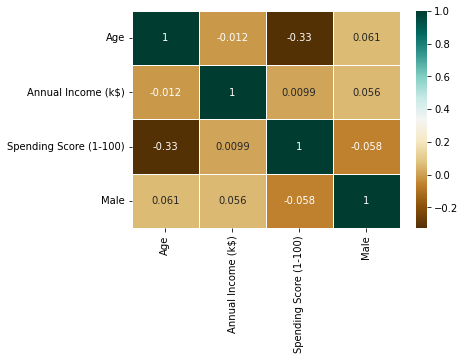

In [56]:
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, cmap = 'BrBG')
plt.show()

A matriz de correlação não foi capaz de prover nenhum _insight_.

Histogramas:

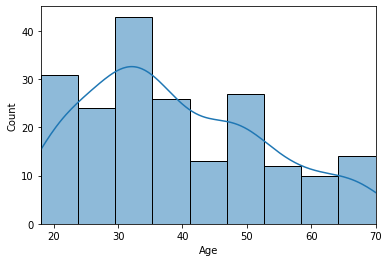

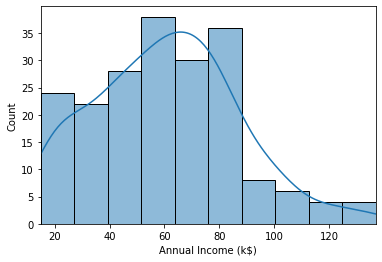

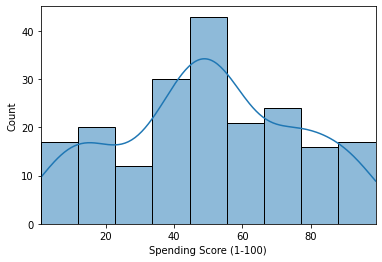

In [57]:
for i in df:
    if i != 'Male':
        fig, ax = plt.subplots()
        sns.histplot(df[i], ax = ax, kde = True)
        ax.set_xlim(left = df[i].min(), right = df[i].max())
        plt.show()

Pela análise dos gráficos acima, é possível observar que os dados não seguem uma distribuição normal.

Gráficos de _boxplot_:

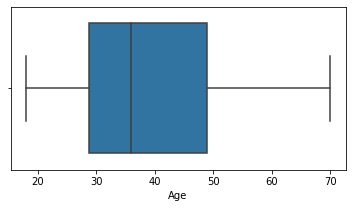

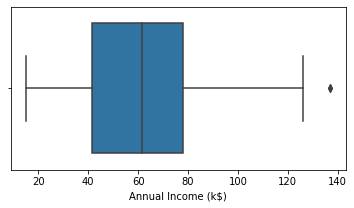

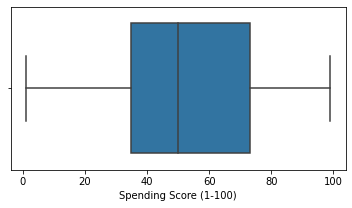

In [58]:
for i in df:
    if i != 'Male':
        plt.figure(figsize = (6,3))
        sns.boxplot(x = df[i])
        plt.show()

Como a quantidade de _outliers_ é desprezível, não será necessário nenhum tratamento para eles.

## 5. Definindo a Distância da Vizinhança

Importando as bibliotecas necessárias:

In [59]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

Como temos 4 dimensões, utilizaremos o número de vizinhos como 8 (MinPts = 2 * 4 = 8):

In [60]:
neighbors = NearestNeighbors(n_neighbors = 8).fit(df)

Calculando as distâncias médias entre cada ponto no conjunto de dados e seus 8 vizinhos mais próximos:

In [61]:
distances, indices = neighbors.kneighbors(df)

Plotando o gráfico da distância entre os pontos:

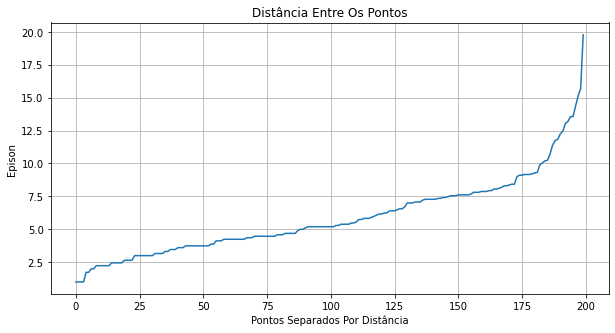

In [62]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize = (10,5))
plt.plot(distances)
plt.title('Distância Entre Os Pontos')
plt.xlabel('Pontos Separados Por Distância')
plt.ylabel('Epison')
plt.grid()
plt.show()

Utilizaremos a distância mínima igual a 10.

## 7. Modelo DBSCAN

Importando a biblioteca:

In [63]:
from sklearn.cluster import DBSCAN

Criando e treinando o modelo:

In [64]:
db = DBSCAN(eps = 10).fit(df)

Extraindo os _labels_ do modelo, agrupando ao _dataframe_ original e exibindo o resultado:

In [65]:
labels = db.labels_
df['cluster'] = labels.astype('str')
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,cluster
0,19,15,39,1,-1
1,21,15,81,1,0
2,20,16,6,0,-1
3,23,16,77,0,0
4,31,17,40,0,-1


Visualizando a quantidade de ocorrências em cada _cluster_:

In [66]:
df['cluster'].value_counts()

1     79
-1    69
2     32
0     15
3      5
Name: cluster, dtype: int64

O _cluster_ -1 representa uma uniformidade de _outliers_. Para falicitar a compreensão visual dos resultados, omitiremos esse grupo em um segundo _dataframe_:

In [67]:
df2 = df[df['cluster'] != '-1']
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,cluster
1,21,15,81,1,0
3,23,16,77,0,0
5,22,17,76,0,0
9,30,19,72,0,0
13,24,20,77,0,0


Criando uma lista com as combinações das colunas (exceto as colunas "cluster" e "Male") e exibindo o resultado:

In [68]:
from itertools import combinations
combinacoes = list(combinations(df2[df2.columns[~df2.columns.isin(['cluster', 'Male'])]].columns, 2))
combinacoes

[('Age', 'Annual Income (k$)'),
 ('Age', 'Spending Score (1-100)'),
 ('Annual Income (k$)', 'Spending Score (1-100)')]

Visualizando a distribuição dos _clusters_:

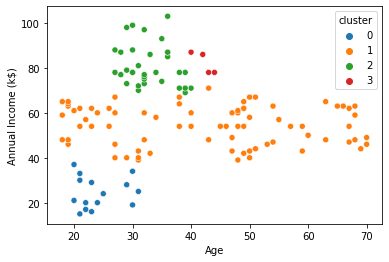

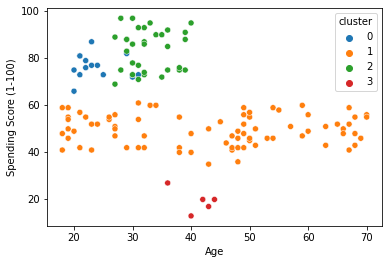

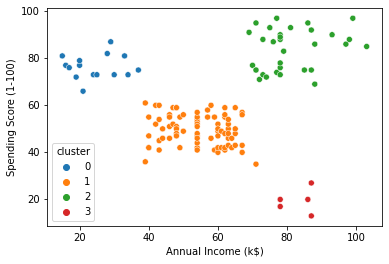

In [69]:
for i in combinacoes:
    plt.figure()
    sns.scatterplot(data = df2, x = i[0], y = i[1], hue = 'cluster')
    plt.show()

## 8. Conclusão

Observando os resultados obtidos acima, entedemos que podemos dividir a amostra disponibilizada em 5 _clusters_, sendo 1 (_cluster_ -1) uma uniformidade de _outliers_.

Na divisão, o _cluster_ 0 seria composto por clientes de idade menor (até 30 e poucos), com alta pontuação de gastos e baixo rendimento anual.

O _cluster_ 1 teria sua composição formada por clientes de idades variadas, pontuação de gastos média e médio rendimento anual.

Já o _cluster_ 2, seria daqueles adultos com até 40 anos e alto rendimento e alta pontuação de gastos.

Por fim, no _cluster_ 3, teríamos alguns clientes com rendimento alto, pontuação de gastos baixa e que estão na faixa dos 40 anos.